# Self-heterodyne csv analysis
### TODO: generalize into a class
use as template for scope data, etc

In [3]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from numpy import *
import csv
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from rigolcsv import *

In [4]:
def process_csv(filename, exclude=2):
    # exclude value is the column we start with; i.e. exclude=2 leaves out column 1.
    exampleFile = open(filename, encoding='utf-8')
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    print(exampleData[1])
    exampleFile.close()
    return exampleData[exclude:]

def get_region_df(df, xcol, offset, halfwidth, noffset=False):
    """ df is a two-column dataframe. return subset of rows zoomed in
        on the region within [offset-halfwidth, offset+halfwidth]. 
    """
    sub_df = df[(df[xcol]>offset-halfwidth) & (df[xcol]<offset+halfwidth)]
    if noffset is True:
        sub_df[xcol] -= offset
    return sub_df

def get_linewidth(xpts, ypts):
    """for xpts and ypts from a spectral trace with ypts in [dB],
    return linewidth in kHz"""
    y0 = max(ypts)
    idxL = idxR = 0
    for i in range(len(ypts)):
        if ypts[i] > y0 - 3:
            idxL = i
            for j in range(idxL,len(ypts)):
                if ypts[j] < ypts[idxL]:
                    idxR = j
                    break
            break

    return (xpts[idxR] - xpts[idxL])/1e3

# RigolCSV analysis

In [26]:
sh_780 = RigolCSV("780Aself_heterodyne_20190412.csv", trace2=True)

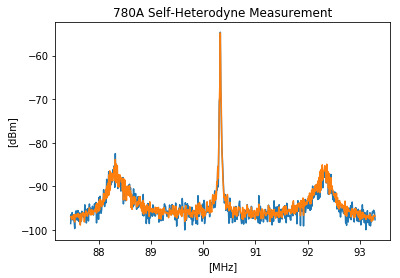

In [28]:
fig,ax = plt.subplots()
ax.set_title("780A Self-Heterodyne Measurement")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
ax.plot((sh_780.xpts1)/(1e6),sh_780.ypts1) # single frame
ax.plot((sh_780.xpts2)/(1e6),sh_780.ypts2) # averaged, 20 frames
plt.show()

## 2020.09.18

In [6]:
sh_780_ul = RigolCSV("moglabs780freerunning_20200918.csv", trace2=True)
sh_780_l = RigolCSV("moglabs780prestablock_20200918.csv", trace2=True)

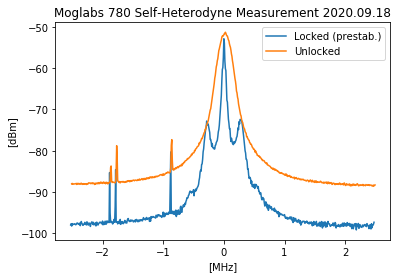

In [10]:
savefile=True
fig,ax = plt.subplots()
ax.set_title("Moglabs 780 Self-Heterodyne Measurement 2020.09.18")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.plot((sh_780_l.xpts1)/(1e6),sh_780_l.ypts1) # single frame
ax.plot((sh_780_l.xpts2)/(1e6),sh_780_l.ypts2, label="Locked (prestab.)") # averaged, 50 frames

# ax.plot((sh_780.xpts1)/(1e6),sh_780.ypts1) # single frame
ax.plot((sh_780_ul.xpts2)/(1e6),sh_780_ul.ypts2, label="Unlocked") # averaged, 50 frames
plt.legend()

if savefile:
    plt.savefig("moglabs780_selfheterodyne_20200918.png")

In [19]:
get_linewidth(sh_780_ul.xpts2,sh_780_ul.ypts2)

158.327

In [29]:
sh_780_zoom = RigolCSV("moglabs780prestablockzoom_20200918.csv", trace2=True)

linewidth = 236.572 kHz


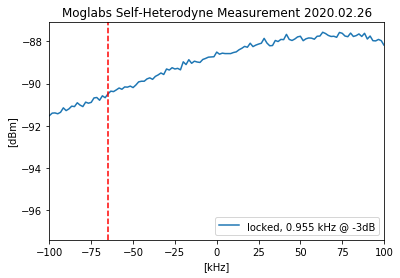

In [30]:
ypts = sh_780_zoom.ypts2
xpts = sh_780_zoom.xpts2
csv = sh_780_zoom
y0 = max(ypts)
idxL = idxR = 0
for i in range(len(ypts)):
    if ypts[i] > y0 - 3:
        idxL = i
        for j in range(idxL,len(ypts)):
            if ypts[j] < ypts[idxL]:
                idxR = j
                break
        break

print(f"linewidth = {(xpts[idxR] - xpts[idxL])/1e3} kHz")

idx2 = 2
fig,ax = plt.subplots()
ax.set_title("Moglabs Self-Heterodyne Measurement 2020.02.26")
ax.set_xlabel("[kHz]")
ax.set_ylabel("[dBm]")
ax.set_xlim(-100, 100)
x0 = csv.xpts2[where(csv.ypts2 == max(csv.ypts2))[0]][0]
ax.plot((xpts)/(1e3),ypts, label='locked, 0.955 kHz @ -3dB')
ax.axvline(xpts[idxL]/(1e3), c='red', linestyle='--')
ax.axvline(xpts[idxR]/(1e3), c='red', linestyle='--')
ax.plot(())
ax.legend()
plt.show()

In [31]:
def plot_linewidths(csvlist, labels, title, xlim):
    assert len(csvlist) == len(labels), "you need a label for each line!"
    
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("[kHz]")
    ax.set_ylabel("[dBm]")
    ax.set_xlim(xlim[0], xlim[1])
    
    for i,csv in enumerate(csvlist):
        xpts = csv.xpts2 # xpts 2 should be the averaged curve 
        ypts = csv.ypts2 
        
#         x0 = csv.xpts2[where(csv.ypts2 == max(csv.ypts2))[0]][0]
        
        lwidth = get_linewidth(xpts, ypts)
        label = labels[i] + f'{lwidth} kHz @ -3dB'
        ax.plot((xpts-x0)/(1e3),ypts, label=label)
    
    ax.legend()
    plt.show()

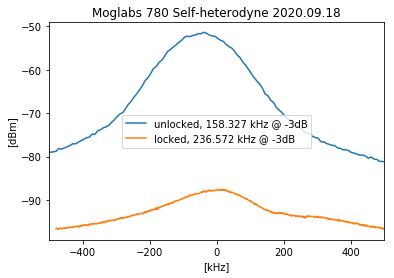

In [32]:
plot_linewidths([sh_780_ul,sh_780_zoom],["unlocked, ","locked, "], "Moglabs 780 Self-heterodyne 2020.09.18",[-500,500])

### 2020.07.27

In [28]:
sh_780_l = RigolCSV("moglabs780_sh_locked2_100khz_20200727.csv", trace2=True)
sh_780_ul = RigolCSV("moglabs780_sh_unlocked_100khz_20200727.csv", trace2=True)

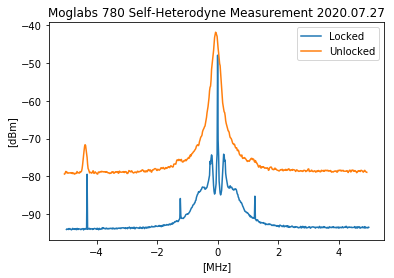

In [29]:
fig,ax = plt.subplots()
ax.set_title("Moglabs 780 Self-Heterodyne Measurement 2020.07.27")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.plot((sh_780_l.xpts1)/(1e6),sh_780_l.ypts1) # single frame
ax.plot((sh_780_l.xpts2)/(1e6),sh_780_l.ypts2, label="Locked") # averaged, 50 frames

# ax.plot((sh_780.xpts1)/(1e6),sh_780.ypts1) # single frame
ax.plot((sh_780_ul.xpts2)/(1e6),sh_780_ul.ypts2, label="Unlocked") # averaged, 50 frames
plt.legend()

plt.savefig("moglabs780_selfheterodyne_20200727.png")

In [15]:
sh_780_l = RigolCSV("moglabs780_sh_locked_1khz_20200727.csv", trace2=True)

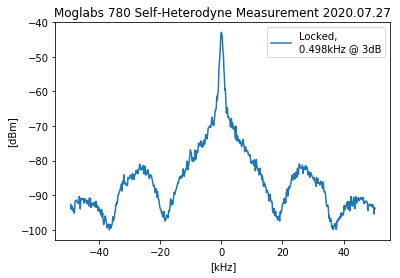

In [27]:
fig,ax = plt.subplots()
ax.set_title("Moglabs 780 Self-Heterodyne Measurement 2020.07.27")
ax.set_xlabel("[kHz]")
ax.set_ylabel("[dBm]")
# ax.plot((sh_780_l.xpts1)/(1e6),sh_780_l.ypts1) # single frame
ax.plot((sh_780_l.xpts2)/(1e3),sh_780_l.ypts2,label=f"Locked,\n{get_linewidth(sh_780_l.xpts2,sh_780_l.ypts2)}kHz @ 3dB") # averaged, 50 frames
plt.legend()
plt.savefig("moglabs780_selfheterodyne_zoom_20200727.png")

In [21]:
print(f"linewidth = {get_linewidth(sh_780_l.xpts2,sh_780_l.ypts2)} kHz")

linewidth = 0.498 kHz


# 780A s.h. 

In [4]:
data = process_csv("780Aself_heterodyne_20190412.csv")

['Freq', '', 'Amp', '', 'Freq', '', 'Amp', '', '']


In [5]:
df = DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8
0,87461057,Hz,-98.57,dBm,87461057,Hz,-97.02,dBm,
1,87470771,Hz,-96.50,dBm,87470771,Hz,-97.18,dBm,
2,87480485,Hz,-97.66,dBm,87480485,Hz,-97.61,dBm,
3,87490199,Hz,-96.05,dBm,87490199,Hz,-96.85,dBm,
4,87499913,Hz,-97.72,dBm,87499913,Hz,-97.04,dBm,


In [6]:
# data from the first trace
trace1_df = df[[0,2]].astype(float)
xpts1, ypts1 = trace1_df.values.transpose()
x0 = xpts1[where(ypts1 == max(ypts1))[0]][0]

In [7]:
# data from the second trace
trace2_df = df[[4,6]].astype(float)
xpts2, ypts2 = trace2_df.values.transpose()

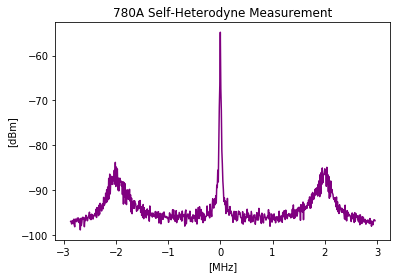

In [8]:
fig,ax = plt.subplots()
ax.set_title("780A Self-Heterodyne Measurement")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.plot((xpts1-x0)/(1e6),ypts1,c="purple") # single frame
ax.plot((xpts2-x0)/(1e6),ypts2,c="purple") # averaged, 20 frames
plt.show()

In [9]:
# zoom in on peak
peak2_df = get_region_df(trace2_df, 4, x0, 5e5)
xptsz, yptsz = peak2_df.values.transpose()

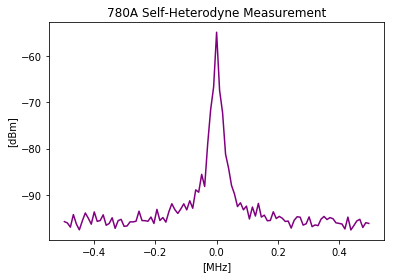

In [10]:
fig,ax = plt.subplots()
ax.set_title("780A Self-Heterodyne Measurement")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
ax.plot((xptsz-x0)/(1e6),yptsz,c="purple") # averaged, 20 frames
plt.show()

In [11]:
# see python-examples\mpl_inset_axes.ipynb to inset the peak

# 960

In [12]:
trace3_df = df[[0,2]].astype(float)
xpts3, ypts3 = trace3_df.values.transpose()
x0 = xpts3[where(ypts3 == max(ypts3))[0]][0]

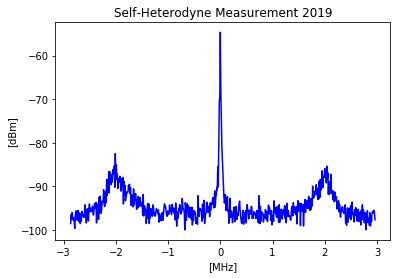

In [14]:
fig,ax = plt.subplots()
ax.set_title("Self-Heterodyne Measurement 2019")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
ax.plot((xpts1-x0)/(1e6),ypts1,c="blue") # single frame
# ax.plot((xpts3-x0)/(1e6),ypts3,c="red") # single frame

## 960 on Fabry-Perot cavity

In [24]:
data = []
for file in ['20200217_960_fp_sh_11km_freerun.csv', '20200217_960_fp_sh_11km_locked.csv']:
    data.append(process_csv(file))
dfs = []
for d in data:
    dfs.append(DataFrame(d))
dfs[0].head()

['Freq', '', 'Amp', '', '']
['Freq', '', 'Amp', '', '']


,0,1,2,3,4
0,51664905,Hz,-103.71,dBm,
1,51669911,Hz,-96.63,dBm,
2,51674917,Hz,-98.15,dBm,
3,51679923,Hz,-100.34,dBm,
4,51684929,Hz,-99.26,dBm,


In [25]:
traces = []
for df in dfs:
    traces.append(df[[0,2]].astype(float).values.transpose())
# trace1_df = df1[[0,2]].astype(float)
# trace2_df = df2[[0,2]].astype(float)
# xpts1, ypts1 = trace1_df.values.transpose()
# xpts2, ypts2 = trace2_df.values.transpose()
xpts1,ypts1 = traces[0]
x0 = xpts1[where(ypts1 == max(ypts1))[0]][0]

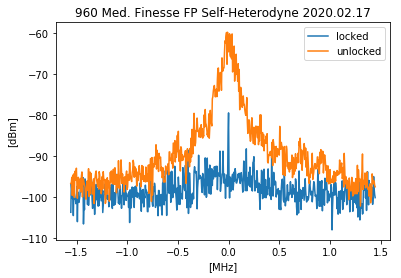

In [29]:
fig,ax = plt.subplots()
ax.set_title("960 Med. Finesse FP Self-Heterodyne 2020.02.17")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
for trace,l in zip(traces,['locked','unlocked']): #zip(traces,['red','blue']): #,'purple','green']):
    xpts, ypts = trace
    ax.plot((xpts-x0)/(1e6),ypts,label=l)#,c=color) # single frame
ax.legend()
plt.show()

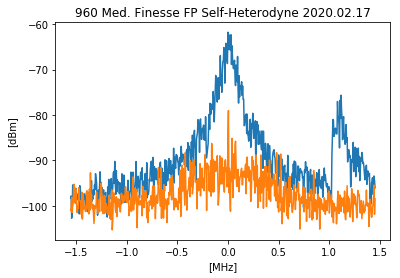

In [23]:
fig,ax = plt.subplots()
ax.set_title("960 Med. Finesse FP Self-Heterodyne 2020.02.17")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
for trace,l in zip(traces,['unlocked','locked']): #zip(traces,['red','blue']): #,'purple','green']):
    xpts, ypts = trace
    ax.plot((xpts-x0)/(1e6),ypts)#,c=color) # single frame

In [ ]:
# Only use the CSV class now

### 25 Feb. 2020, 960 S.H.

In [18]:
files = ["960lock20200226 2.csv","960lock20200226.csv",
         "960lockzoom20200226 2.csv","960unlocked20200225.csv"]
csvs = [RigolCSV(file, trace2=True) for file in files]

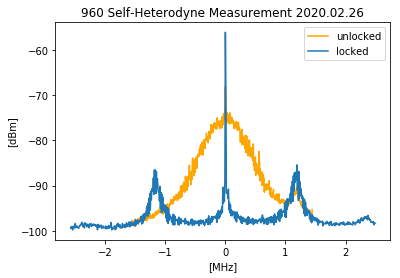

In [33]:
idx1 = 1
idx2 = 3
fig,ax = plt.subplots()
ax.set_title("960 Self-Heterodyne Measurement 2020.02.26")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.set_ylim(-95))
x0 = csvs[idx2].xpts2[where(csvs[idx2].ypts2 == max(csvs[idx2].ypts2))[0]][0]
ax.plot((csvs[idx2].xpts2 - x0)/(1e6),csvs[idx2].ypts2-13, c='orange', label='unlocked') # averaged, 20 frames
ax.plot((csvs[idx1].xpts2)/(1e6),csvs[idx1].ypts2, label='locked') # single frame
ax.legend()
plt.show()

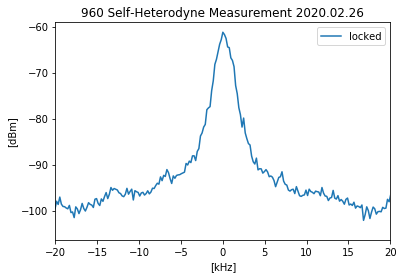

In [40]:
idx2 = 2
fig,ax = plt.subplots()
ax.set_title("960 Self-Heterodyne Measurement 2020.02.26")
ax.set_xlabel("[kHz]")
ax.set_ylabel("[dBm]")
ax.set_xlim(-20, 20)
x0 = csvs[idx2].xpts2[where(csvs[idx2].ypts2 == max(csvs[idx2].ypts2))[0]][0]
ax.plot((csvs[idx2].xpts2 - x0)/(1e3),csvs[idx2].ypts2, label='locked') # averaged, 20 frames
ax.legend()
plt.show()

In [58]:
xpts = csvs[idx2].xpts2
ypts = csvs[idx2].ypts2
x0 = xpts[where(ypts == max(ypts))][0]
xpts -= x0

In [43]:
len(ypts)

601

linewidth = 0.955 kHz


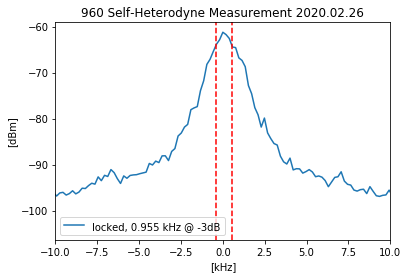

In [70]:
y0 = max(ypts)
idxL = idxR = 0
for i in range(len(ypts)):
    if ypts[i] > y0 - 3:
        idxL = i
        for j in range(idxL,len(ypts)):
            if ypts[j] < ypts[idxL]:
                idxR = j
                break
        break

print(f"linewidth = {(xpts[idxR] - xpts[idxL])/1e3} kHz")

idx2 = 2
fig,ax = plt.subplots()
ax.set_title("960 Self-Heterodyne Measurement 2020.02.26")
ax.set_xlabel("[kHz]")
ax.set_ylabel("[dBm]")
ax.set_xlim(-10, 10)
x0 = csvs[idx2].xpts2[where(csvs[idx2].ypts2 == max(csvs[idx2].ypts2))[0]][0]
ax.plot((xpts)/(1e3),ypts, label='locked, 0.955 kHz @ -3dB')
ax.axvline(xpts[idxL]/(1e3), c='red', linestyle='--')
ax.axvline(xpts[idxR]/(1e3), c='red', linestyle='--')
ax.plot(())
ax.legend()
plt.show()

In [50]:
xpts[idxR]

955.0

### 780A 21 Oct 2020

In [17]:
files = ["sh_moglabs_filter_cav_output_20201021.csv","sh_moglabs_output_20201021.csv",
         "sh_moglabs_filter_cav_output_zoom_20201021.csv","sh_moglabs_output_zoom_20201021.csv"]
csvs = [RigolCSV(file, trace2=False) for file in files]

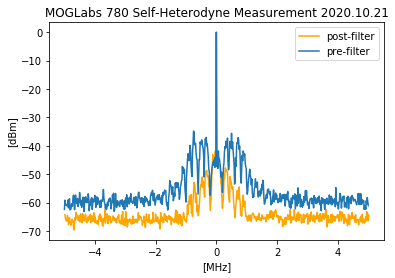

In [33]:
idx1 = 1
idx2 = 0 # filtered
fig,ax = plt.subplots()
ax.set_title("MOGLabs 780 Self-Heterodyne Measurement 2020.10.21")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.set_ylim(-95))
x0 = csvs[idx2].xpts1[where(csvs[idx2].ypts1 == max(csvs[idx2].ypts1))[0]][0]
y01 = max(csvs[idx1].ypts1)
y02 = max(csvs[idx2].ypts1)
ax.plot((csvs[idx2].xpts1 - x0)/(1e6),csvs[idx2].ypts1-y02, c='orange', label='post-filter') # averaged, 20 frames
ax.plot((csvs[idx1].xpts1)/(1e6),csvs[idx1].ypts1-y01, label='pre-filter') # single frame
ax.legend()
# plt.show()
plt.savefig("moglabs_spectral_filtering_20201021.png",bbox_inches='tight')

0.0

### 780A 3 Mar. 2020 

In [18]:
files = ["960lock20200226 2.csv","960lock20200226.csv",
         "960lockzoom20200226 2.csv","960unlocked20200225.csv"]
csvs = [RigolCSV(file, trace2=True) for file in files]

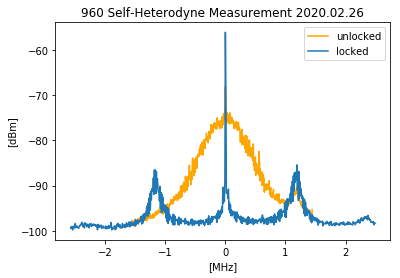

In [33]:
idx1 = 1
idx2 = 3
fig,ax = plt.subplots()
ax.set_title("960 Self-Heterodyne Measurement 2020.02.26")
ax.set_xlabel("[MHz]")
ax.set_ylabel("[dBm]")
# ax.set_ylim(-95))
x0 = csvs[idx2].xpts2[where(csvs[idx2].ypts2 == max(csvs[idx2].ypts2))[0]][0]
ax.plot((csvs[idx2].xpts2 - x0)/(1e6),csvs[idx2].ypts2-13, c='orange', label='unlocked') # averaged, 20 frames
ax.plot((csvs[idx1].xpts2)/(1e6),csvs[idx1].ypts2, label='locked') # single frame
ax.legend()
plt.show()